# Task1

# Data Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
import datetime

In [2]:
#Readin Transaction Data
Transac_Data=pd.read_excel("C:/Users/user/Downloads/QVI_transaction_data.xlsx")
Transac_Data["DATE"]=pd.to_datetime(Transac_Data["DATE"],unit="D")

In [3]:
Transac_Data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
#Purchase Data
purchase=pd.read_csv("C:/Users/user/Downloads/QVI_purchase_behaviour.csv");
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Exploratory data analysis
##  Transaction

In [5]:
Transac_Data.shape

(264836, 8)

In [6]:
Transac_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
Transac_Data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [8]:
Transac_Data.PROD_NAME.describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [9]:
# Transac_Data.PROD_NAME.unique()

I will focus and manipulate on product column for :
- Brands names
- Flavors
- Packet Size

### Cleaning PROD_NAME Column


In [10]:
# Listing the product column from Transaction data
prod_name = list(Transac_Data['PROD_NAME'])

# replace smith's errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].lower().replace('smith', 'smith\'s')
    prod_name[i] = prod_name[i].replace('smiths', 'smith\'s')
    prod_name[i] = prod_name[i].replace('smith\'ss', 'smith\'s')
    prod_name[i] = prod_name[i].replace('crnkle', 'crinkle')
    prod_name[i] = prod_name[i].replace('chs', 'cheese')
    prod_name[i] = prod_name[i].replace('orgnl', 'original')
    prod_name[i] = prod_name[i].replace('s/', 'sour ')
    prod_name[i] = prod_name[i].replace('swt', 'sweet')
    prod_name[i] = prod_name[i].replace('chli', 'chilli')
    prod_name[i] = prod_name[i].replace('chili', 'chilli')
    prod_name[i] = prod_name[i].replace('chlli', 'chilli')
    prod_name[i] = prod_name[i].replace('big bag', 'party size')
    prod_name[i] = prod_name[i].replace('oniondip', 'onion dip')
    prod_name[i] = prod_name[i].replace('cutsalt', 'cut salt')
    prod_name[i] = prod_name[i].replace('chip', 'chips')
    prod_name[i] = prod_name[i].replace('chipss', 'chips')
    prod_name[i] = re.sub('chips\s+thinly', 'thinly', prod_name[i])
    prod_name[i] = re.sub('crinkle\s+chips', 'crinkle cut', prod_name[i])
    prod_name[i] = re.sub('crinkle\s+cut\s+chips', 'crinkle cut', prod_name[i])
    prod_name[i] = re.sub('thinly\s+sour',
                          'thinly cut sour', prod_name[i].lower())
    prod_name[i] = re.sub('thinly\s+sweet',
                          'thinly cut sweet', prod_name[i].lower())
    prod_name[i] = re.sub('crinkle\s+original', 'crinkle cut original', prod_name[i].lower())
    prod_name[i] = prod_name[i].replace('/', ' ')
    prod_name[i] = prod_name[i].replace('&', ' ')

In [11]:
# replace cc's errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('ccs','cc\'s')

In [12]:
# replace cobs pop'd errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('popd','pop\'d')
    prod_name[i] = prod_name[i].replace('crm', 'cream')
    prod_name[i] = prod_name[i].replace('sr','sour')

In [13]:
# replace doritos errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('dorito', 'doritos')
    prod_name[i] = prod_name[i].replace('doritoss', 'doritos')
    prod_name[i] = prod_name[i].replace('chp', 'chips cheese')
    prod_name[i] = re.sub('doritos\s+cheese', 'doritos corn chips cheese', prod_name[i])

In [14]:
# replace grain waves errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('grnwves', 'grain waves')
    prod_name[i] = prod_name[i].replace('btroot', 'beetroot')

In [15]:
# replace infuzions errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('infzns', 'infuzions')
    prod_name[i] = prod_name[i].replace('chutny', 'chutney')
    prod_name[i] = prod_name[i].replace('papadums', 'papadams')
    prod_name[i] = re.sub('sourcream\s+herbs\s+veg\s+strws', 'sour cream herbs veggie straws', prod_name[i])
    prod_name[i] = prod_name[i].replace('potatomix', 'potato mix')
    prod_name[i] = prod_name[i].replace('sweetchilli', 'sweet chilli')
    prod_name[i] = re.sub('crn\s+crnchers\s+tangy\s+gcamole', 'corn crunchers tangy guacamole', prod_name[i])

In [16]:
# replace kettle errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('siracha', 'sriracha')
    prod_name[i] = prod_name[i].replace('pot', 'potato')
    prod_name[i] = prod_name[i].replace('potatoato', 'potato')
    prod_name[i] = prod_name[i].replace('cheesesbeetroot', 'cheese beetroot')
    prod_name[i] = prod_name[i].replace('cheesesfeta', 'cheese feta')
    prod_name[i] = prod_name[i].replace('cheeseshny', 'cheese shiny')
    prod_name[i] = prod_name[i].replace('jlpno', 'jalapeno')

In [17]:
# replace natural chip co errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('ncc', 'natural chip co')
    prod_name[i] = prod_name[i].replace('compny', 'co')
    prod_name[i] = prod_name[i].replace('chipco', 'chip co')
    prod_name[i] = prod_name[i].replace('chipsco', 'chip co')
    prod_name[i] = re.sub('chips\s+co', 'chip co', prod_name[i])
    prod_name[i] = prod_name[i].replace('seasalt', 'sea salt')
    prod_name[i] = prod_name[i].replace('vinegr', 'vinegar')
    prod_name[i] = prod_name[i].replace('hony', 'honey')
    prod_name[i] = prod_name[i].replace('chckn', 'chicken')
    prod_name[i] = re.sub('tmato\s+hrb\s+spce', 'tomato herb spice', prod_name[i])

In [18]:
# replace pringles erros
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('sourcream', 'sour cream')
    prod_name[i] = prod_name[i].replace('slt', 'salt')
    prod_name[i] = prod_name[i].replace('friedchicken', 'fried chicken')
    prod_name[i] = prod_name[i].replace('vingar', 'vinegar')
    prod_name[i] = prod_name[i].replace('sthrn', 'southern')
    prod_name[i] = prod_name[i].replace('spcy', 'spicy')
    prod_name[i] = prod_name[i].replace('crips', 'chips')

In [19]:
# replace red rock deli erros
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('rrd', 'red rock deli')
    prod_name[i] = prod_name[i].replace('chikn', 'chicken')
    prod_name[i] = re.sub('deli\s+sp', 'deli chips', prod_name[i])
    prod_name[i] = prod_name[i].replace('pc', 'potato chips')
    prod_name[i] = prod_name[i].replace('rst', 'roast')
    prod_name[i] = prod_name[i].replace('chimuchurri', 'chimichurri')

In [20]:
# replace Sunbites Wholegrain erros
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('whlgrn', 'wholegrain')
    prod_name[i] = prod_name[i].replace('snbts', 'sunbites')
    prod_name[i] = prod_name[i].replace('whlegrn', 'wholegrain')
    prod_name[i] = prod_name[i].replace('crichipss', 'crisps')
    prod_name[i] = prod_name[i].replace('cheddr', 'cheddar')
    prod_name[i] = prod_name[i].replace('mstrd', 'mustard')
    prod_name[i] = prod_name[i].replace('frch', 'french')
    prod_name[i] = prod_name[i].replace('onin', 'onion')

In [21]:
# replace thins errors 
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('saltd', 'salted')
    prod_name[i] = prod_name[i].replace('seasonedchicken', 'seasoned chicken')

In [22]:
# replace tostitos errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('chipsotle', 'chippotle')

In [23]:
# replace tyrrells errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = re.sub('ched\s+chives', 'cheddar chives', prod_name[i])

In [24]:
# replace woolworths errors
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('ww', 'woolworths')
    prod_name[i] = re.sub('d\s+style', 'deli style', prod_name[i])
    prod_name[i] = prod_name[i].replace('onionstacked', 'onion stacked')

In [25]:
#remove all words with digits and special characters such as '&' from our set of product words
for i in range(len(Transac_Data['PROD_NAME'])):
    prod_name[i] = re.sub('\s+', ' ', prod_name[i])
    prod_name[i] = re.sub('[0-9]+[a-z]', '', prod_name[i]).strip()

In [26]:
# Listing the brands name to be able matching the correct name
brands = ['natural chip co', "cc\'s", "smith\'s", 'kettle', 'old el paso',
       'grain waves', 'doritos', 'twisties', 'thins',
       'burger rings', 'cheezels', 'infuzions', 'red rock deli',
       'pringles', 'tyrrells', "cobs pop\'d", 'woolworths', 'french fries',
       'tostitos', 'cheetos', 'sunbites wholegrain']

In [27]:
#Split Prod_Name into Packet_size and Brands
from string import capwords
packet_size=[]
Brand=[]
for s in Transac_Data['PROD_NAME']:
  packet_size.append(re.findall(r'[0-9]+' ,s)[0])
for i in range(len(prod_name)):
  for brand in brands :
    if prod_name[i].__contains__(brand):
      Brand.append(capwords(brand))
Transac_Data['Packet_Size']=packet_size
Transac_Data['Brand']=Brand

In [28]:
# #Extract Flavors from Product Name 
# Transac_Data['PROD_NAME'] = prod_name
Transac_Data['PROD'] = [Transac_Data['PROD_NAME'][i][len(Transac_Data['Brand'][i]):].strip() for i in range(len(Transac_Data['PROD_NAME']))]

In [29]:
# Change Packet Size Foramt into numeric type
Transac_Data['Packet_Size'] = pd.to_numeric(Transac_Data['Packet_Size'])

In [30]:
# Split DATE into Years, Months and Days
Transac_Data['YEAR'] = pd.Series([date.year for date in Transac_Data['DATE']])
Transac_Data['MONTH'] = pd.Series([date.month for date in Transac_Data['DATE']])
Transac_Data['DAY'] = pd.Series([date.day for date in Transac_Data['DATE']])

In [31]:
#Calculate Price Per Each product quantity
Transac_Data['UNIT_PRICE'] = Transac_Data['TOT_SALES']/Transac_Data['PROD_QTY']

In [32]:
# Drop Salsa from Products as it's not important product for now
Transac_Data.drop(Transac_Data[[("Salsa" in s)  for s in Transac_Data['PROD_NAME']]].index,inplace=True)

In [33]:
# Take a quick look at it
Transac_Data[[("Salsa" in s)  for s in Transac_Data['PROD_NAME']]]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE


In [34]:
#Summary after droping some Rows
Transac_Data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Packet_Size,YEAR,MONTH,DAY,UNIT_PRICE
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178,2018.495315,6.534972,15.714179,3.832411
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727,0.499979,3.447867,8.775152,1.077798
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,2018.000000,1.000000,1.000000,1.320000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000,2018.000000,4.000000,8.000000,3.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000,2018.000000,7.000000,16.000000,3.800000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000,2019.000000,10.000000,23.000000,4.600000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000,2019.000000,12.000000,31.000000,6.500000


In [35]:
Transac_Data.PROD_NAME.describe()

count                                     246742
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [36]:
Transac_Data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Packet_Size       0
Brand             0
PROD              0
YEAR              0
MONTH             0
DAY               0
UNIT_PRICE        0
dtype: int64

## Removing anomalies Values

In [37]:
#Explore Product Quantity
Transac_Data["PROD_QTY"].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

Note product quantity appears to have an outlier

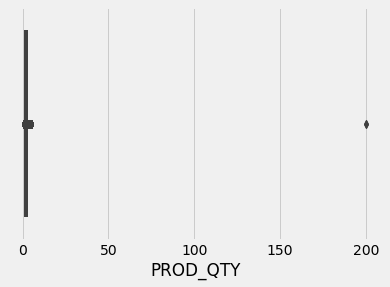

In [38]:
# Outliers From Prod_Quantity
sns.boxplot(Transac_Data.PROD_QTY)

In [39]:
# Let's investigate further the case where 200 packets of chips are bought in one transaction
Transac_Data[Transac_Data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme 380g,2018,8,19,3.25
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme 380g,2019,5,20,3.25


In [40]:
Transac_Data[Transac_Data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme 380g,2018,8,19,3.25
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,Corn Chp Supreme 380g,2019,5,20,3.25


There are two transactions where 200 packets of chips are bought in one transaction  and both of these transactions were by the same customer.

In [41]:
# We'll remove this loyalty card number from further analysis
Transac_Data.drop(Transac_Data[Transac_Data['PROD_QTY']==200].index,inplace=True)

In [42]:
Transac_Data["PROD_QTY"].describe()

count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

In [43]:
# Count the number of transactions by date
Transactions_perDate = pd.DataFrame(Transac_Data.groupby('DATE')['TXN_ID'].count()).reset_index()
len(Transactions_perDate)

364

There's only 364 rows, meaning only 364 dates which indicates a missing date

In [44]:
#create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
Transactions_perDate=pd.DataFrame({'DATE':pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')})
Transactions_perDate.set_index('DATE',inplace=True)
Transactions_perDate['No.Trans']=Transac_Data.groupby('DATE')['TXN_ID'].count()
Transactions_perDate.reset_index(inplace=True)

#### - Plot Transaction Over Time To Find Missing Date 

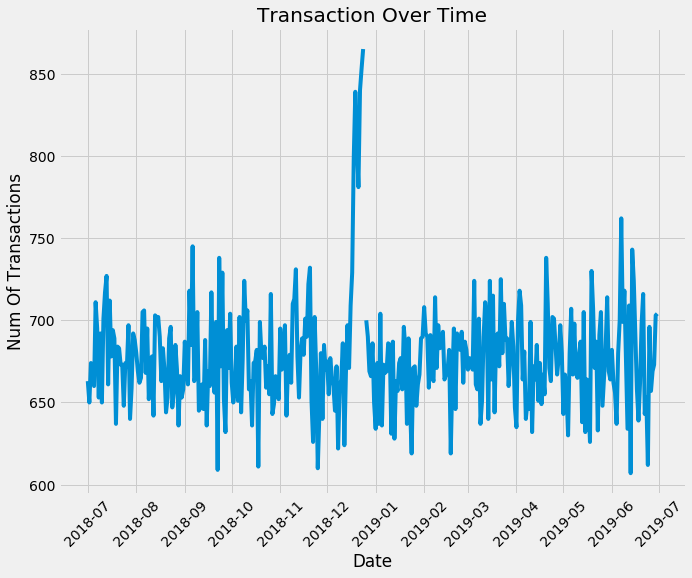

In [45]:
import matplotlib.dates as mdates
locator=mdates.MonthLocator()
plt.subplots(figsize=[10,8])
plt.plot(Transactions_perDate['DATE'],Transactions_perDate['No.Trans']);
X=plt.gca().xaxis
X.set_major_locator(locator)
plt.title('Transaction Over Time');
plt.xlabel('Date');
plt.ylabel('Num Of Transactions');
plt.xticks(rotation=45);

There is an increase in December and break in late December

Let's Zoom in December Only

In [46]:
# Filter DATE Column for Only December Days
Transactions_perDate=Transactions_perDate[(Transactions_perDate['DATE'] >='2018-12-01')&
                                          (Transactions_perDate['DATE'] <='2018-12-31')]

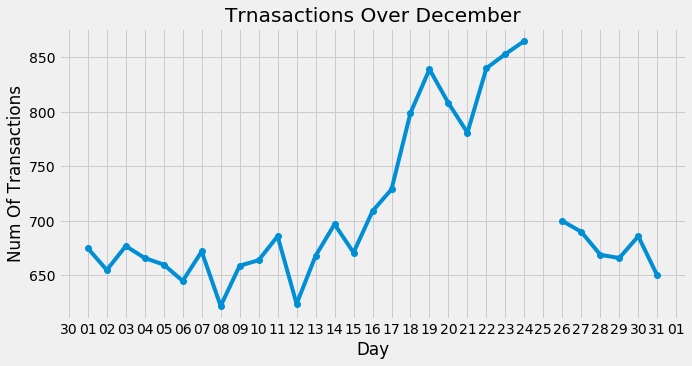

In [47]:
# Specify x axis for only days to see when the breaeking is accure
Locator = mdates.DayLocator()
DayFormat=mdates.DateFormatter('%d')
plt.subplots(figsize=[10,5])
plt.plot(Transactions_perDate['DATE'],Transactions_perDate['No.Trans'],marker='o');
X = plt.gca().xaxis
X.set_major_locator(Locator)
X.set_major_formatter(DayFormat)
plt.title('Trnasactions Over December');
plt.xlabel('Day');
plt.ylabel('Num Of Transactions');

- Ohh! there is a missing date appeare in 2018-12-25 !

In [48]:
#seeing data at 2018-12-25
Transac_Data[Transac_Data['DATE']=='2018-12-25']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE


- We notic that's the Christmas day , so This is due to shops being closed on 

In [49]:
# number of transactions by packet size.
Pks_Trans=pd.DataFrame(Transac_Data.groupby('Packet_Size')['TXN_ID'].count()).reset_index()
Pks_Trans.sort_values('TXN_ID',ascending=False).head()

,Packet_Size,TXN_ID
10,175,66390
6,150,40203
4,134,25102
2,110,22387
9,170,19983


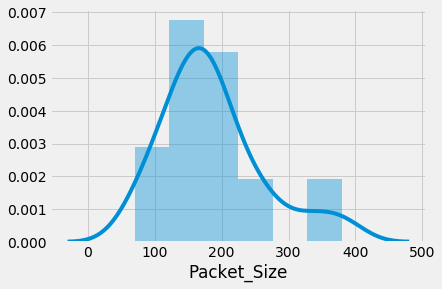

In [50]:
# Plot a histogram showing the number of transactions by packet size.
sns.distplot(Pks_Trans.Packet_Size)

175    66390
150    40203
134    25102
110    22387
170    19983
Name: Packet_Size, dtype: int64


Text(0, 0.5, 'Packet_Size')

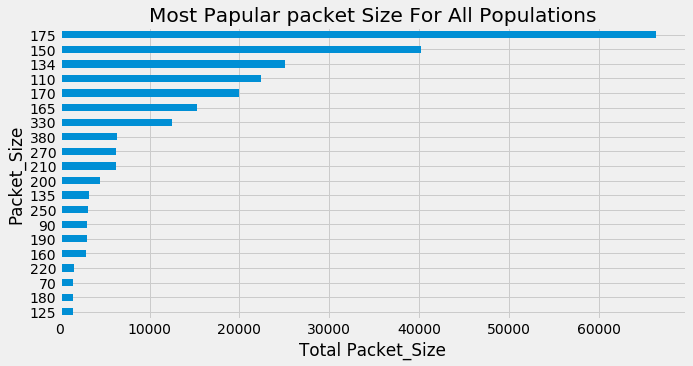

In [51]:
# Most Papular packet Size For all Populations
print(Transac_Data['Packet_Size'].value_counts().nlargest(5))
plt.figure(figsize=(10,5))
Transac_Data.groupby(['Packet_Size'])['Packet_Size'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Most Papular packet Size For All Populations")
plt.xlabel('Total Packet_Size')
plt.ylabel('Packet_Size')

Kettle           41288
Smith's          30353
Doritos          25224
Pringles         25102
Red Rock Deli    16321
Name: Brand, dtype: int64


Text(0, 0.5, 'Brands')

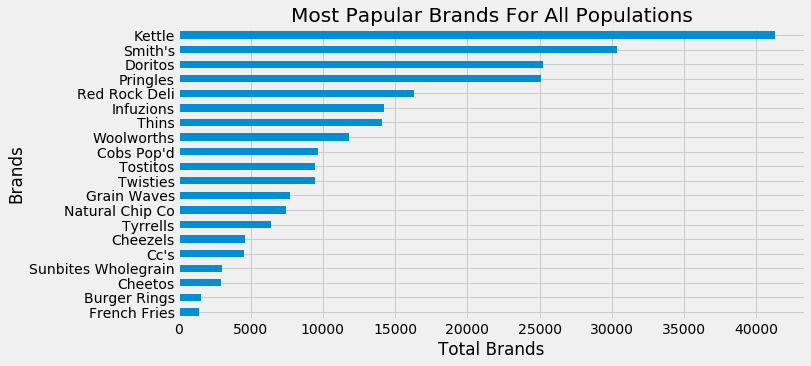

In [52]:
# Most Papular Brands For all Populations
print(Transac_Data['Brand'].value_counts().nlargest(5))
plt.figure(figsize=(10,5))
Transac_Data.groupby(['Brand'])['Brand'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Most Papular Brands For All Populations")
plt.xlabel('Total Brands')
plt.ylabel('Brands')

## Purchase

In [53]:
#Reading Customer Data
purchase=pd.read_csv("C:/Users/user/Downloads/QVI_purchase_behaviour.csv");
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [54]:
purchase.LYLTY_CARD_NBR.nunique()

72637

In [55]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [56]:
# Summary Statistics
purchase.describe(include='O')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [57]:
# Checking for null values
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Merging DataSets

In [58]:
# Merging Two Data Sets
full_df=pd.merge(Transac_Data,purchase,on='LYLTY_CARD_NBR',how='left')
full_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,Compny SeaSalt175g,2018,10,17,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Cc's,Nacho Cheese 175g,2019,5,14,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith's,Crinkle Cut Chips Chicken 170g,2019,5,20,1.45,MIDAGE SINGLES/COUPLES,Budget


In [59]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   Packet_Size       246740 non-null  int64         
 9   Brand             246740 non-null  object        
 10  PROD              246740 non-null  object        
 11  YEAR              246740 non-null  int64         
 12  MONTH             246740 non-null  int64         
 13  DAY               246740 non-null  int64         
 14  UNIT

In [60]:
# Checking for null values
full_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Packet_Size         0
Brand               0
PROD                0
YEAR                0
MONTH               0
DAY                 0
UNIT_PRICE          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [61]:
full_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Packet_Size,YEAR,MONTH,DAY,UNIT_PRICE
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521,2018.495315,6.534972,15.714148,3.832416
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118,0.499979,3.447878,8.775181,1.077801
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,2018.000000,1.000000,1.000000,1.320000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000,2018.000000,4.000000,8.000000,3.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000,2018.000000,7.000000,16.000000,3.800000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000,2019.000000,10.000000,23.000000,4.600000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000,2019.000000,12.000000,31.000000,6.500000


In [62]:
full_df.shape

(246740, 17)

In [63]:
# Checking for duplicate values
full_df[full_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Packet_Size,Brand,PROD,YEAR,MONTH,DAY,UNIT_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,Smith's,Thinly Cut Roast Chicken 175g,2018,10,1,3.0,OLDER SINGLES/COUPLES,Premium


In [64]:
# Drop duplicated values
full_df.drop_duplicates(inplace=True)
print(full_df.shape)

(246739, 17)


# Customer Analysis

In [65]:
# Prepare Plot Function for barplot instead of writing it every time
def BarPlots(data ,x , y ,hue ,title, ylabel, xlabel, loc='best' ,h=22 , w=8 ,size=15,f='.0f'):
    plt.figure(figsize=(h,w))
    plots=sns.barplot(x=data[x] , y=data[y] ,hue=data[hue],ci=0)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), f),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=size, xytext=(0, 8), 
                       textcoords='offset points')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(loc=loc) 

Let's see who spends the most on chips (total sales), describing customers by lifestage and their purchasing behaviour

In [66]:
# Who spends the most on chips (total sales), describing customers by lifestage and their purchasing behaviour
TOTSALES_Customer=pd.DataFrame(full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()).sort_values('TOT_SALES',ascending=False).reset_index()
TOTSALES_Customer.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,OLDER FAMILIES,Budget,156863.75
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20
2,RETIREES,Mainstream,145168.95
3,YOUNG FAMILIES,Budget,129717.95
4,OLDER SINGLES/COUPLES,Budget,127833.60


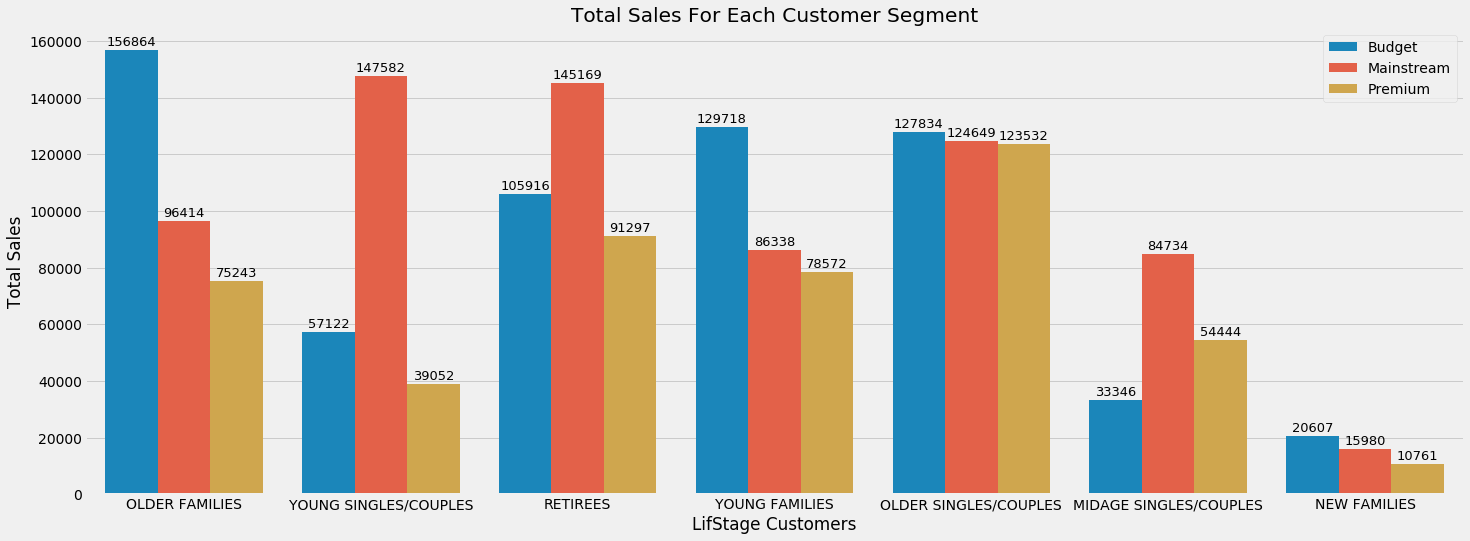

In [67]:
BarPlots(data=TOTSALES_Customer,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER'
         ,title='Total Sales For Each Customer Segment',ylabel='Total Sales',xlabel='LifStage Customers',size=13)

- The Visual plot be illustrated that the Total Sales per customers segment From more to less
> - The 'Budget Older Families' occupies the highest and most enumerated category

Let's see how many customers per each segment

In [68]:
# How many customers per each segment
NumCustomer=pd.DataFrame(purchase.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count()).sort_values('LYLTY_CARD_NBR',ascending=False).reset_index()
NumCustomer.head()

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR
0,Mainstream,YOUNG SINGLES/COUPLES,8088
1,Mainstream,RETIREES,6479
2,Mainstream,OLDER SINGLES/COUPLES,4930
3,Budget,OLDER SINGLES/COUPLES,4929
4,Premium,OLDER SINGLES/COUPLES,4750


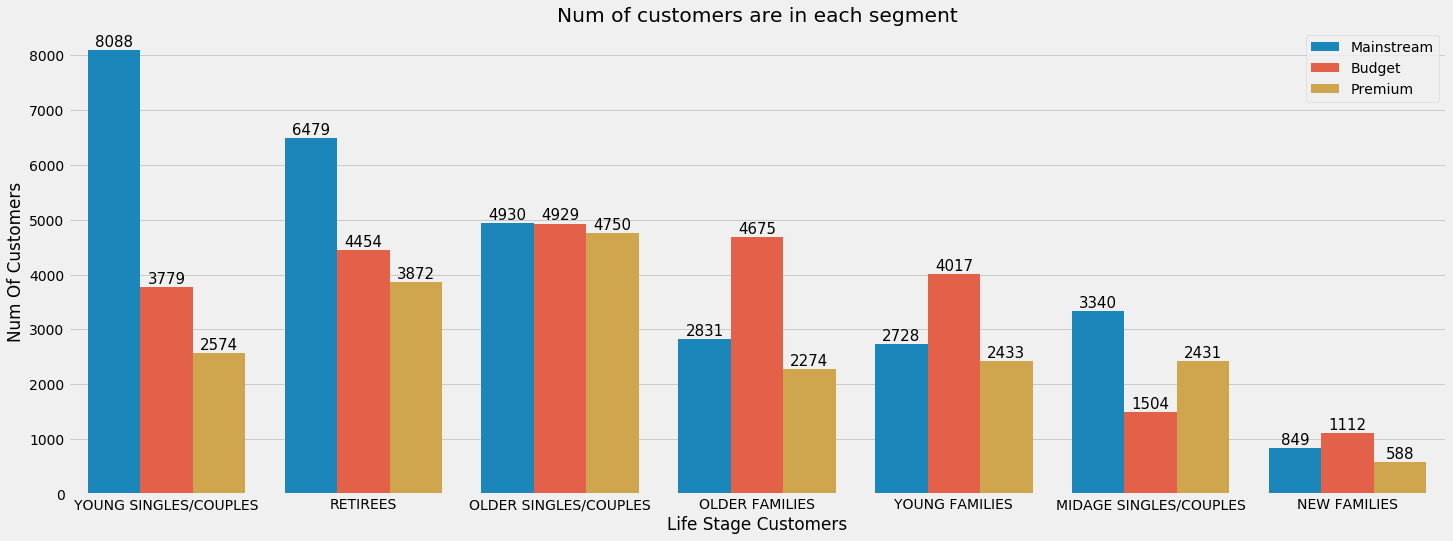

In [69]:
BarPlots(data=NumCustomer,x='LIFESTAGE',y='LYLTY_CARD_NBR',hue='PREMIUM_CUSTOMER'
         ,title='Num of customers are in each segment',ylabel='Num Of Customers',xlabel='Life Stage Customers')

- The Visual plot be illustrated that the Total Customers in each segment From more to less

> - The 'Maistream Singles/Couples' occupies the highest and most enumerated category

Let's see how many chips are bought per customers segment

In [70]:
# How many chips are bought per customers segment
Chips_per_Customer=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].count()).sort_values('PROD_QTY',ascending=False).reset_index()
Chips_per_Customer.head()

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Budget,OLDER FAMILIES,21514
1,Mainstream,RETIREES,19970
2,Mainstream,YOUNG SINGLES/COUPLES,19544
3,Budget,YOUNG FAMILIES,17763
4,Budget,OLDER SINGLES/COUPLES,17172


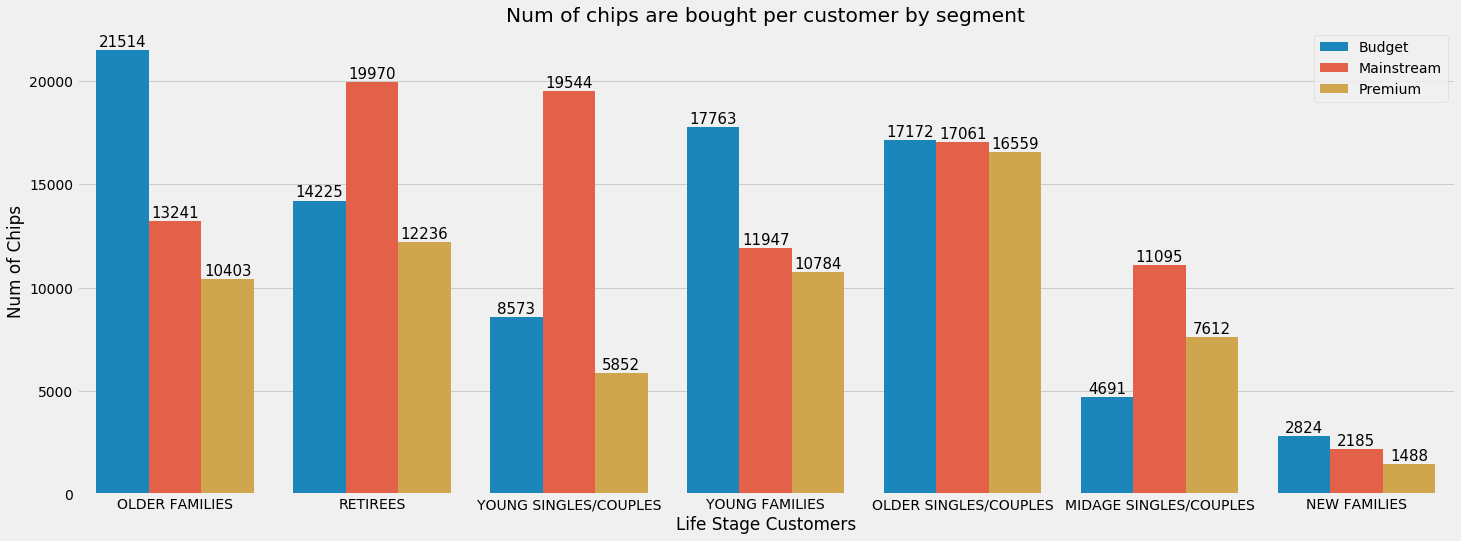

In [71]:
BarPlots(data=Chips_per_Customer,x='LIFESTAGE',y='PROD_QTY',hue='PREMIUM_CUSTOMER'
         ,title='Num of chips are bought per customer by segment',ylabel='Num of Chips',xlabel='Life Stage Customers')

- The Visual plot be illustrated that the Numbers of chips are bought per customers segment From more to less
> - The 'Budget Older Families' occupies the highest and most enumerated category

Let's calculate the average chip price per customer segment

In [72]:
# What's the average chip price per customer segment
AVG_price_Customer=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['UNIT_PRICE'].mean()).sort_values('UNIT_PRICE',ascending=False).reset_index()
AVG_price_Customer.head()

,PREMIUM_CUSTOMER,LIFESTAGE,UNIT_PRICE
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241
2,Budget,RETIREES,3.924404
3,Premium,RETIREES,3.920942
4,Budget,NEW FAMILIES,3.917688


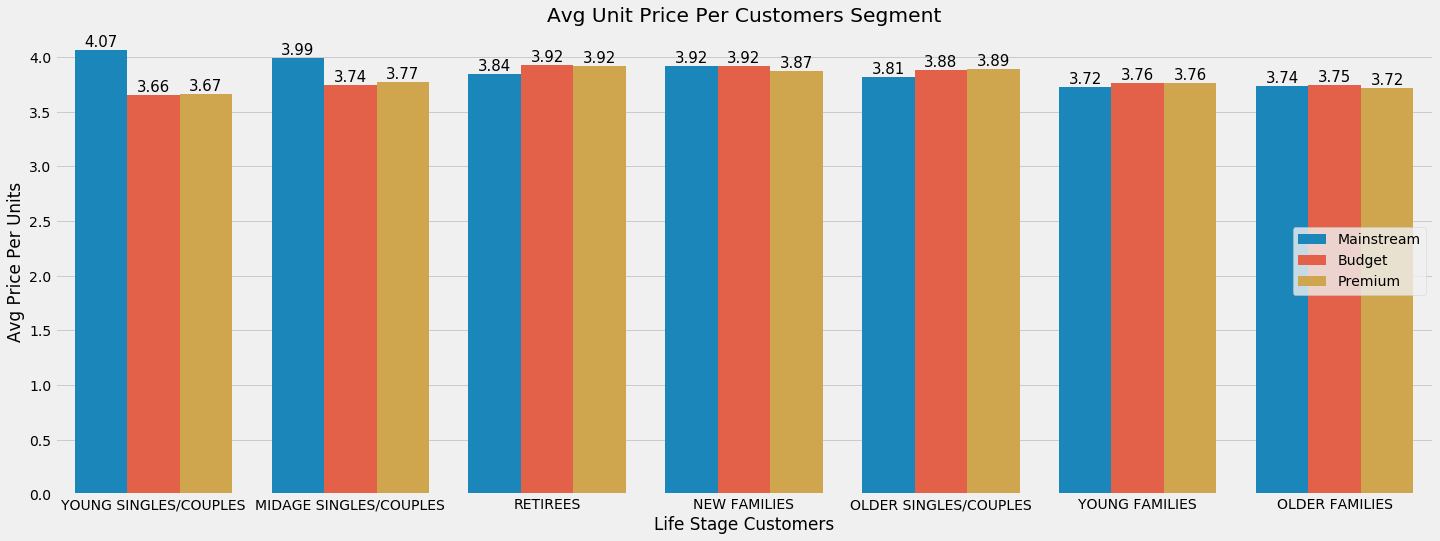

In [73]:
BarPlots(data=AVG_price_Customer,x='LIFESTAGE',y='UNIT_PRICE',hue='PREMIUM_CUSTOMER'
         ,title='Avg Unit Price Per Customers Segment',ylabel='Avg Price Per Units'
         ,xlabel='Life Stage Customers',f='.2f',loc='center right')

- The Visual plot be illustrated that Avg Unit Price Per Customers Segment From more to less
> - The 'Mainstream Young Singles/Couples' occupies the highest and most enumerated category

Let's Calculate the total spend over years for each Customer Segment

In [74]:
# customer's total spend over years for each Customer
TotSpend_PerYears=pd.DataFrame(full_df.groupby(['YEAR','PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum()).sort_values('TOT_SALES',ascending=False).reset_index()
TotSpend_PerYears.head()

,YEAR,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
0,2018,Budget,OLDER FAMILIES,78509.85
1,2019,Budget,OLDER FAMILIES,78353.90
2,2018,Mainstream,YOUNG SINGLES/COUPLES,74804.10
3,2018,Mainstream,RETIREES,73267.95
4,2019,Mainstream,YOUNG SINGLES/COUPLES,72778.10


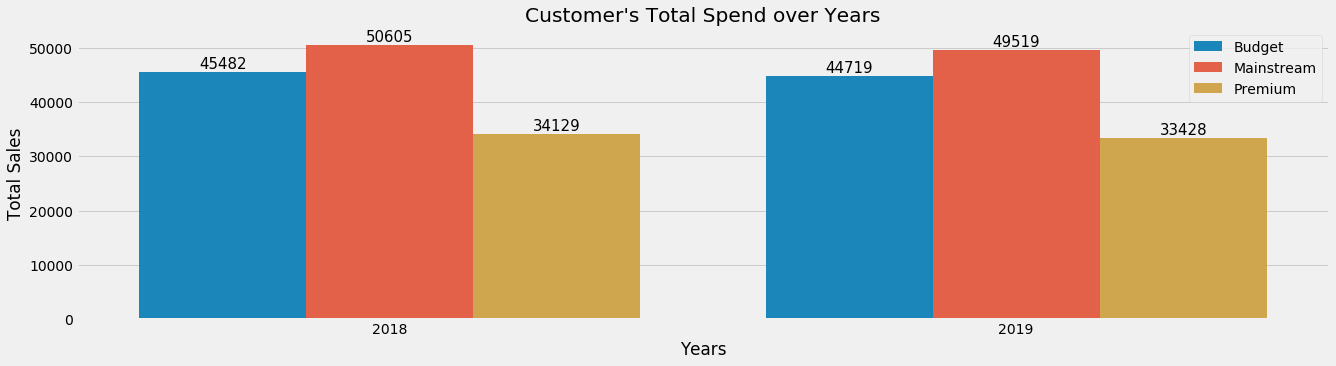

In [75]:
BarPlots(data=TotSpend_PerYears,x='YEAR',y='TOT_SALES',hue='PREMIUM_CUSTOMER'
         ,title='Customer\'s Total Spend over Years',ylabel='Total Sales',xlabel='Years',h=20,w=5)

- The Visual plot be illustrated the Customer's Total Spend over Years 
> - The 'Mainstream' occupies the highest and most enumerated category

Let's Calculate the Total sales per Customer Segment

In [76]:
# Total sales per Customer Segment
Customers_spending=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].count()).sort_values('TOT_SALES',ascending=False).reset_index()
Customers_spending.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
0,Budget,OLDER FAMILIES,21514
1,Mainstream,RETIREES,19970
2,Mainstream,YOUNG SINGLES/COUPLES,19544
3,Budget,YOUNG FAMILIES,17763
4,Budget,OLDER SINGLES/COUPLES,17172


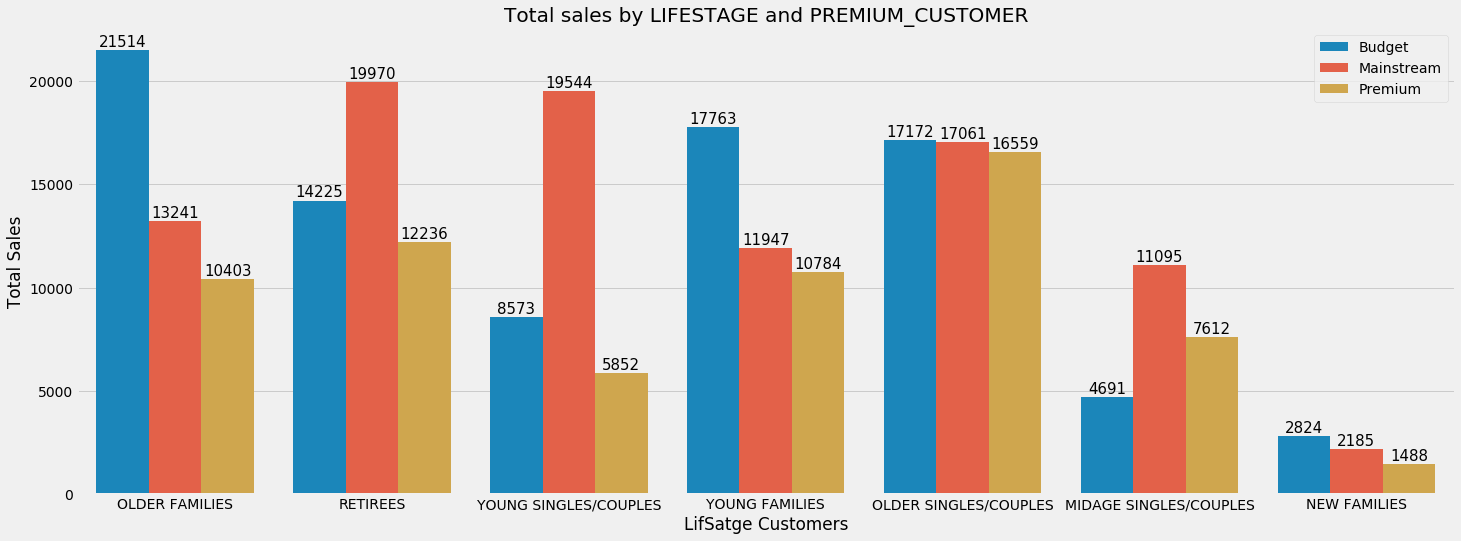

In [77]:
BarPlots(data=Customers_spending,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER'
         ,title='Total sales by LIFESTAGE and PREMIUM_CUSTOMER',ylabel='Total Sales',xlabel='LifSatge Customers')

- The Visual plot be illustrated the Total sales Per Customers Segment From more to less
> - The 'Budget Older Families' occupies the highest and most enumerated category

Let's Calculate Number of customers Segment to see if the higher sales are due to there being more customers who buy chips

In [78]:
# Number of customers segment
Customer_Count=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])["LYLTY_CARD_NBR"].count()).sort_values('LYLTY_CARD_NBR',ascending=False).reset_index()
Customer_Count.head()

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR
0,Budget,OLDER FAMILIES,21514
1,Mainstream,RETIREES,19970
2,Mainstream,YOUNG SINGLES/COUPLES,19544
3,Budget,YOUNG FAMILIES,17763
4,Budget,OLDER SINGLES/COUPLES,17172


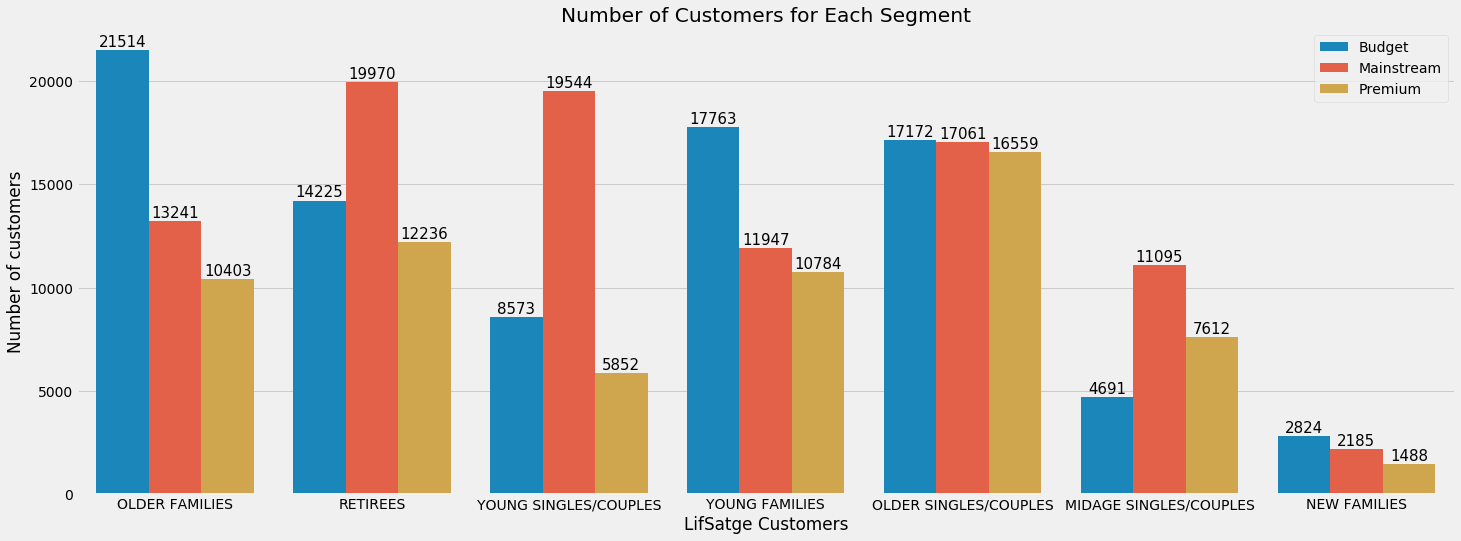

In [79]:
BarPlots(data=Customer_Count,x='LIFESTAGE',y='LYLTY_CARD_NBR',hue='PREMIUM_CUSTOMER'
         ,title='Number of Customers for Each Segment',ylabel='Number of customers'
         ,xlabel='LifSatge Customers')

- The Visual plot be illustrated the Number of Customers for Each Segment From more to less
> - The 'Budget Older Families' occupies the highest and most enumerated category

Let's Calculate the average number of product units per customer segment

In [80]:
#  Aaverage number of product units per customer segment
AVG_unite_Customer_Lfstg=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].mean()).sort_values('PROD_QTY',ascending=False).reset_index()
AVG_unite_Customer_Lfstg.head()

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Mainstream,OLDER FAMILIES,1.948795
1,Premium,OLDER FAMILIES,1.945496
2,Budget,OLDER FAMILIES,1.945384
3,Mainstream,YOUNG FAMILIES,1.941408
4,Budget,YOUNG FAMILIES,1.941226


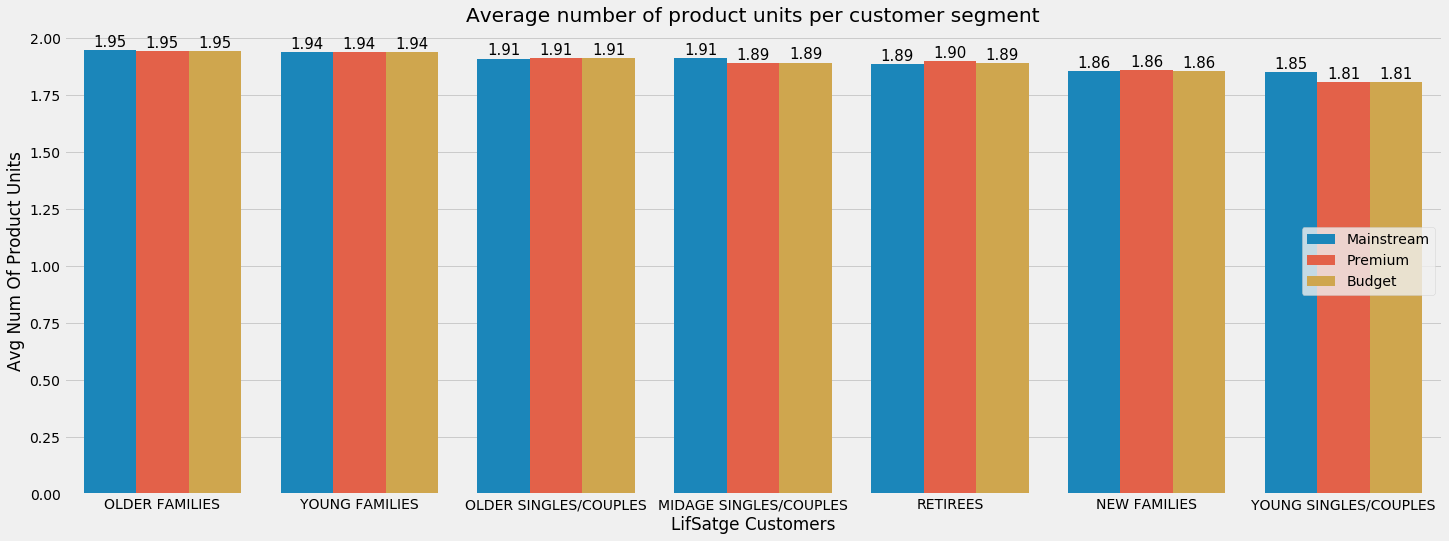

In [81]:
BarPlots(data=AVG_unite_Customer_Lfstg,x='LIFESTAGE',y='PROD_QTY',hue='PREMIUM_CUSTOMER'
         ,title='Average number of product units per customer segment',ylabel='Avg Num Of Product Units'
         ,xlabel='LifSatge Customers',f='.2f',loc='center right')

- The Visual plot be illustrated the Average number of product units per customer Segment From more to less
> - The 'Mainstream Older Families' occupies the highest and most enumerated category

Let's Calculate the average Unit Price per Customer Segment

In [82]:
# Average Unit Price per Customer Segment
AVG_price_Customer_Lfstg=pd.DataFrame(full_df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['UNIT_PRICE'].mean()).sort_values('UNIT_PRICE',ascending=False).reset_index()
AVG_price_Customer_Lfstg.head()

,PREMIUM_CUSTOMER,LIFESTAGE,UNIT_PRICE
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241
2,Budget,RETIREES,3.924404
3,Premium,RETIREES,3.920942
4,Budget,NEW FAMILIES,3.917688


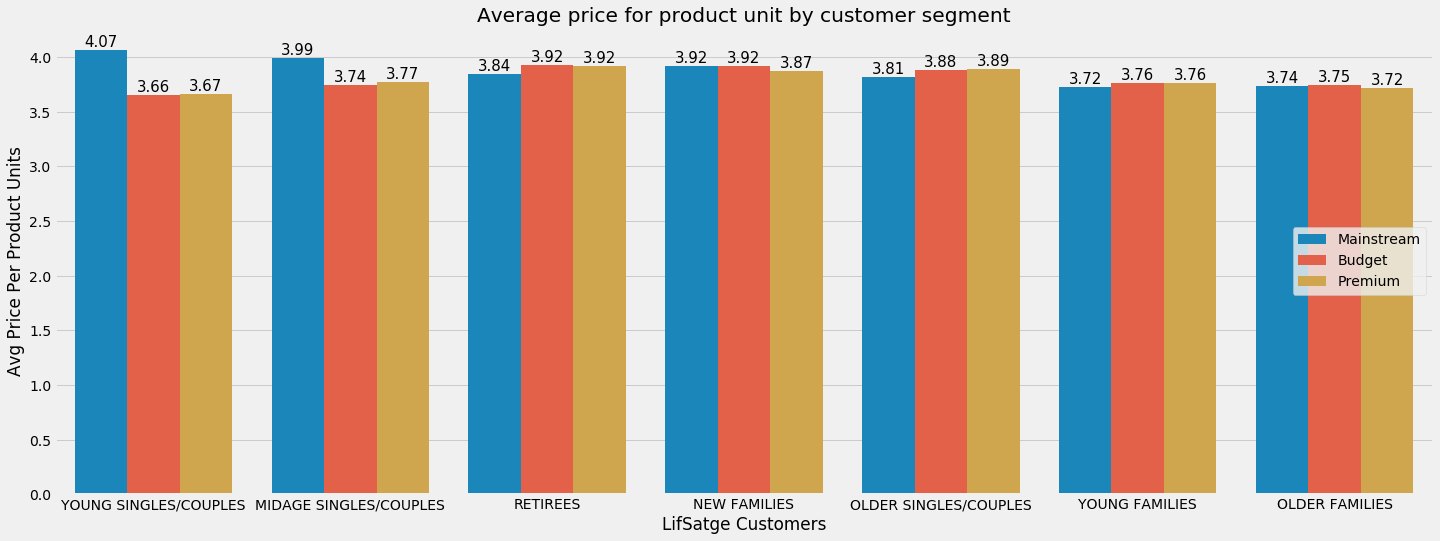

In [83]:
BarPlots(data=AVG_price_Customer_Lfstg,x='LIFESTAGE',y='UNIT_PRICE',hue='PREMIUM_CUSTOMER'
         ,title='Average price for product unit by customer segment',ylabel='Avg Price Per Product Units'
         ,xlabel='LifSatge Customers',f='.2f',loc='center right')

- The Visual plot be illustrated the Average price of product units per customer Segment From more to less

> - The 'Mainstream Young Singles/Couples' occupies the highest and most enumerated category

> - Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. 

> - This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

> - This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

> - As the difference in average price per unit isn't large, we can check if this difference is statistically different.


## T-Test
Perform a t-test to see if the difference is significant

In [84]:
#import Scipy
from scipy import stats

Mainstream vs. Premium

In [85]:
# t-test For Mainstream('MIDAGE(3.994241) and YOUNG Singles/Couples(4.065642)') 
# Vs. Premium('MIDAGE(3.770698) and YOUNG Singles/Couples(3.665414)')
stats.ttest_ind([4.065642,3.994241],[3.665414,3.770698])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

Mainstream vs. Budget

In [86]:
# t-test For Mainstream('MIDAGE(3.994241) and YOUNG Singles/Couples(4.065642)') 
# Vs. Budget(MIDAGE(3.743328) and YOUNG Singles/Couples(3.657366))
stats.ttest_ind([4.065642,3.994241],[3.657366,3.743328])

Ttest_indResult(statistic=5.898899732826305, pvalue=0.027555775534860754)

- P-value 0.03 , 0.02 are < 0.05 "Critical Values" 

> - So that's mean we will ignore the null hypothesis('Not By Chance')
***
> - the unit price for mainstream, young and mid-age singles and couples( ARE )significantly higher than that of budget or premium, young and midage singles and couples.

For now we will focus and tend to target for Mainstream mid-age and young singles / couples

In [87]:
# Filter customer segment for (Mainstream with 'Young singles/Couples' and 'MidAge') to match Most Brand , Packet_size of themMail
MainStream_MIDAGE_Brand=pd.DataFrame(full_df[(full_df['PREMIUM_CUSTOMER']=='Mainstream') & (full_df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')])
MainStream_YOUNG_Brand=pd.DataFrame(full_df[(full_df['PREMIUM_CUSTOMER']=='Mainstream') & (full_df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')])

let's find out if they tend to buy a particular brand of chips

In [88]:
print('Popular Brands For Mainstream MIDAGE Segment\n')
print(MainStream_YOUNG_Brand['Brand'].value_counts().nlargest(3),'\n')
print('Popular Brands For Mainstream YOUNG Segment\n')
print(MainStream_MIDAGE_Brand['Brand'].value_counts().nlargest(3))

Popular Brands For Mainstream MIDAGE Segment

Kettle      3844
Doritos     2379
Pringles    2315
Name: Brand, dtype: int64 

Popular Brands For Mainstream YOUNG Segment

Kettle     2136
Smith's    1276
Doritos    1210
Name: Brand, dtype: int64


Text(0, 0.5, 'Brands')

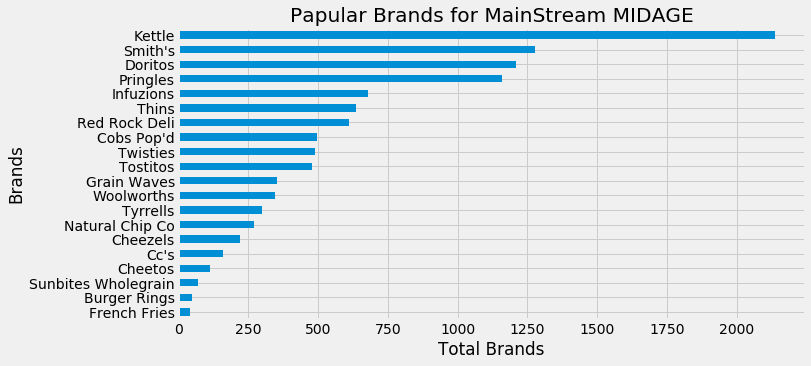

In [89]:
plt.figure(figsize=(10,5))
MainStream_MIDAGE_Brand.groupby(['Brand'])['Brand'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Papular Brands for MainStream MIDAGE")
plt.xlabel('Total Brands')
plt.ylabel('Brands')

- The Visual plot be illustrated Papular Brands for MainStream MIDAGE From more to less
> - Top 3 papular Brands for "Mainstream MIDAGE" are ( Kettle , Smiths and Doritos )

Text(0, 0.5, 'Brands')

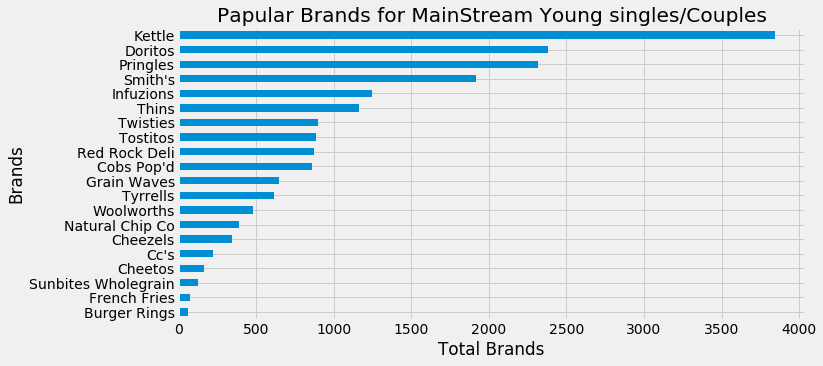

In [90]:
plt.figure(figsize=(10,5))
MainStream_YOUNG_Brand.groupby(['Brand'])['Brand'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Papular Brands for MainStream Young singles/Couples")
plt.xlabel('Total Brands')
plt.ylabel('Brands')

 - The Visual plot be illustrated Papular Brands for MainStream MIDAGE From more to less
 > - Top 3 papular Brands for "Mainstream YOUNG"  are ( Kettle ,Doritos and Pringles )

let's find out if they tend to buy a particular brand of chips

In [91]:
print('Popular PacketSize For Mainstream MIDAGE Segment\n')
print(MainStream_YOUNG_Brand['Packet_Size'].value_counts().nlargest(3),'\n')
print('Popular PacketSize For Mainstream YOUNG Segment\n')
print(MainStream_MIDAGE_Brand['Packet_Size'].value_counts().nlargest(3))

Popular PacketSize For Mainstream MIDAGE Segment

175    4997
150    3080
134    2315
Name: Packet_Size, dtype: int64 

Popular PacketSize For Mainstream YOUNG Segment

175    2975
150    1777
134    1159
Name: Packet_Size, dtype: int64


Text(0, 0.5, 'Packet_Size')

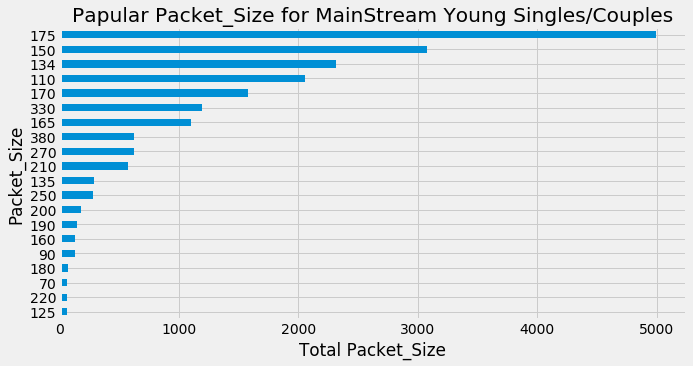

In [92]:
plt.figure(figsize=(10,5))
MainStream_YOUNG_Brand.groupby(['Packet_Size'])['Packet_Size'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Papular Packet_Size for MainStream Young Singles/Couples")
plt.xlabel('Total Packet_Size')
plt.ylabel('Packet_Size')

Text(0, 0.5, 'Packet_Size')

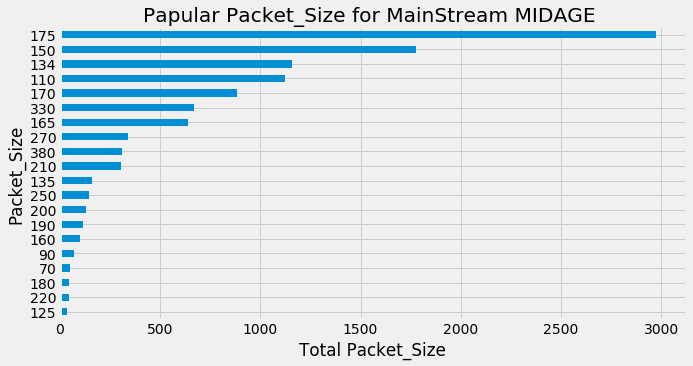

In [93]:
plt.figure(figsize=(10,5))
MainStream_MIDAGE_Brand.groupby(['Packet_Size'])['Packet_Size'].count().sort_values(ascending=True).plot(kind='barh')
plt.title("Papular Packet_Size for MainStream MIDAGE ")
plt.xlabel('Total Packet_Size')
plt.ylabel('Packet_Size')

 - The Visual plots be illustrated Papular Packet Size for MainStream MIDAGE and Yound singles/couples From more to less
 > - Top 3 Papular Packet Size for Both Segment (175g ,150g and 134g)


# Association rules
Association rules is a rule-based machine learning method to discover interesting relations between variables

In [94]:
# Install mlxtend Library
# !pip install mlxtend

In [95]:
# Import mlxtend library
from mlxtend.frequent_patterns import apriori, association_rules

In [96]:
# Unpivot Brands to see total of Brand for each Card Number
Brand_basket=pd.DataFrame(full_df.groupby(['LYLTY_CARD_NBR','Brand'])['PROD_QTY'].sum().unstack().fillna(0))
Brand_basket

Brand,Burger Rings,Cc's,Cheetos,Cheezels,Cobs Pop'd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smith's,Sunbites Wholegrain,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For an apriori technique that's accept only MAtrix with (0,1) values
***
so Let's convert each values bigger than 1 to be equal 1

In [97]:
def Matrix(x):
    if x <= 0:
        return 0
    else:
        return 1
Brand_basket=Brand_basket.applymap(Matrix)
Brand_basket

Brand,Burger Rings,Cc's,Cheetos,Cheezels,Cobs Pop'd,Doritos,French Fries,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smith's,Sunbites Wholegrain,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2370701,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2370751,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now It's ready to be an correct input for apriori method

We will specify the suppor percentage at >=10 % only

In [98]:
MostFreq=apriori(Brand_basket,0.1,use_colnames=True).sort_values('support',ascending=False)
MostFreq

,support,itemsets
4,0.423303,(Kettle)
7,0.314896,(Smith's)
1,0.290446,(Doritos)
5,0.289772,(Pringles)
6,0.180103,(Red Rock Deli)
3,0.177311,(Infuzions)
8,0.176624,(Thins)
11,0.139661,(Woolworths)
12,0.136420,"(Doritos, Kettle)"
13,0.135452,"(Pringles, Kettle)"


Now we have the support percentage of each items which correlated with other items which scoring 10% and more

Now let's apply the theory of the "association_rules" , which take some paramters :
> - Freqency of each items "Which was previously calculated"
> - Metric measurment
> - Minimum threshold

In [99]:
association_rules(MostFreq,metric='lift',min_threshold=1).sort_values(['support','confidence','lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Doritos),(Kettle),0.290446,0.423303,0.136420,0.469693,1.109591,0.013474,1.087478
1,(Kettle),(Doritos),0.423303,0.290446,0.136420,0.322276,1.109591,0.013474,1.046966
2,(Pringles),(Kettle),0.289772,0.423303,0.135452,0.467444,1.104279,0.012791,1.082886
3,(Kettle),(Pringles),0.423303,0.289772,0.135452,0.319989,1.104279,0.012791,1.044436
4,(Smith's),(Kettle),0.314896,0.423303,0.135130,0.429125,1.013754,0.001833,1.010199
5,(Kettle),(Smith's),0.423303,0.314896,0.135130,0.319227,1.013754,0.001833,1.006362


- That's meaning if we target Brands such 'Doritos' we will find there is a 46% higher chance that the Customers will buy 'Kettle' with it